In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [6]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
df.shape

(3999, 12)

In [12]:
df = df.drop('ID#', axis=1, errors='ignore')
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [16]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [18]:
scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


Text(0.5, 1.0, 'Distribution of Balance')

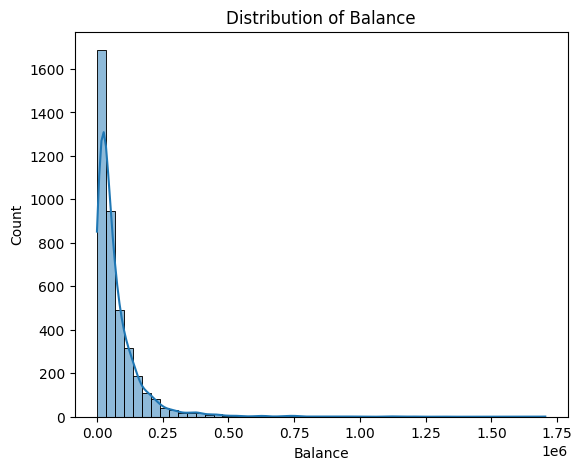

In [19]:
# EDA step 2: Distribution of key features (e.g., Balance and Flight_miles_12mo)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Balance'], kde=True, bins=50)
plt.title('Distribution of Balance')

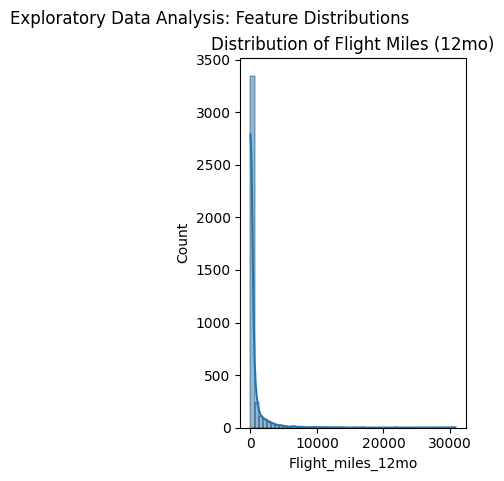

In [20]:
plt.subplot(1, 2, 2)
sns.histplot(df['Flight_miles_12mo'], kde=True, bins=50)
plt.title('Distribution of Flight Miles (12mo)')
plt.suptitle('Exploratory Data Analysis: Feature Distributions')
plt.show()


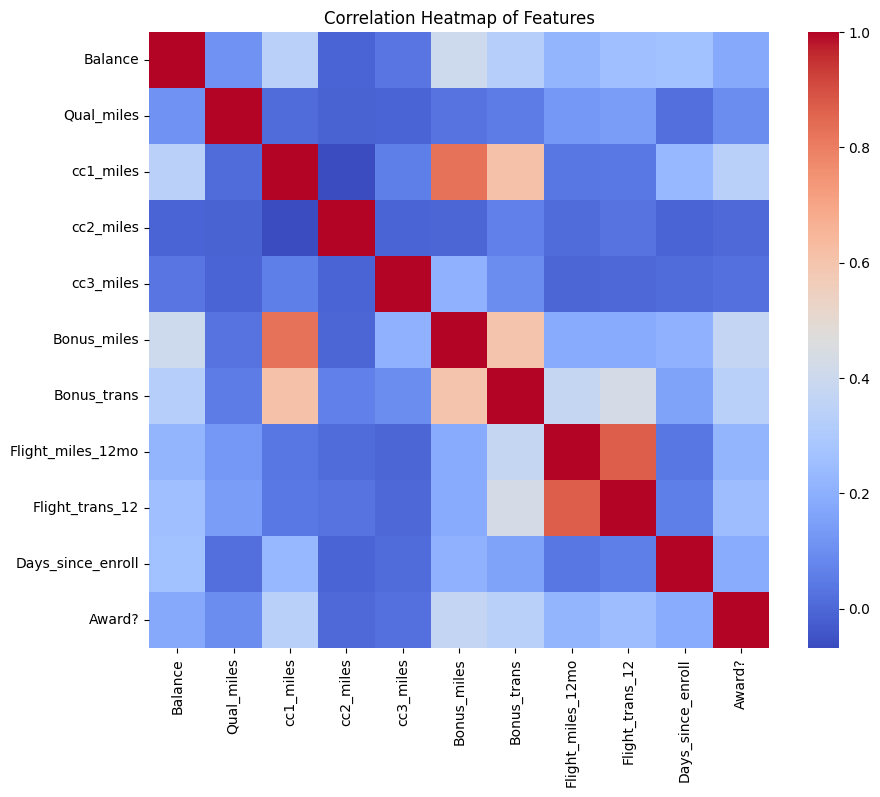

In [21]:
# EDA step 3: Correlation Heatmap (Hidden patterns)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()
# Note: High correlations exist between cc1_miles and Bonus_miles, and Flight_miles_12mo and Flight_trans_12.

In [22]:
# Prepare data for 2D visualization (PCA is used for dimensionality reduction)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

In [25]:
pca


PCA(n_components=2)

In [26]:
principal_components

array([[-1.46667427, -0.06718286],
       [-1.4505642 , -0.06374317],
       [-1.2100507 , -0.13355511],
       ...,
       [ 0.17353576, -0.61180929],
       [-1.69524058,  0.72653107],
       [-2.10886559,  0.40309321]])

In [27]:
pca_df

,PC1,PC2
0,-1.466674,-0.067183
1,-1.450564,-0.063743
2,-1.210051,-0.133555
3,-1.507201,-0.061529
4,3.006984,-0.185534
...,...,...
3994,-0.955029,0.460020
3995,-1.032571,0.301103
3996,0.173536,-0.611809
3997,-1.695241,0.726531


In [28]:
# --- 3. Implementing K-Means Clustering ---

# K-Means Parameter Experimentation (Elbow Curve)
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


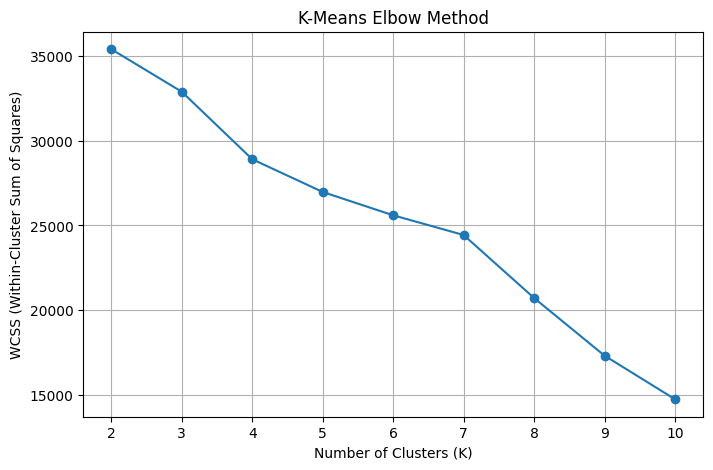

In [29]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [30]:
# Insight: The elbow appears to be around K=4 or K=5. We will select K=4 for demonstration.

# Apply K-Means with K=4
K = 4
kmeans_final = KMeans(n_clusters=K, random_state=42, n_init='auto')
kmeans_labels = kmeans_final.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels


In [31]:
# Evaluation
kmeans_score = silhouette_score(scaled_df, kmeans_labels)
print(f"\nK-Means (K={K}) Silhouette Score: {kmeans_score:.4f}")



K-Means (K=4) Silhouette Score: 0.1907


In [32]:
# --- 4. Implementing Hierarchical Clustering ---

# Hierarchical Clustering Experimentation (Dendrogram)
# Generate the linkage matrix for 'ward' linkage
linked = linkage(scaled_df, method='ward')

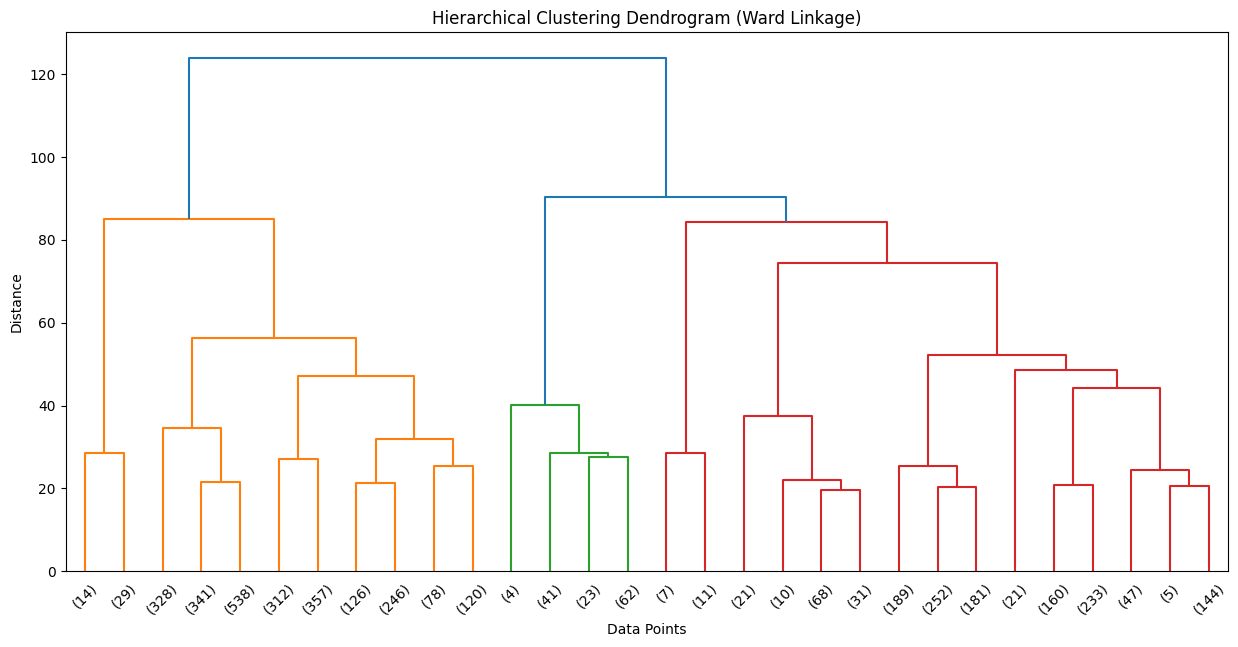

In [33]:
# Plot the Dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [34]:
# Insight: Cutting the dendrogram at a high distance suggests 4-5 clusters, consistent with K-Means.

In [35]:
# Apply Hierarchical Clustering with n_clusters=4 (Ward linkage)
hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hierarchical_labels


In [36]:
# Evaluation
hierarchical_score = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical (n=4, Ward) Silhouette Score: {hierarchical_score:.4f}")

Hierarchical (n=4, Ward) Silhouette Score: 0.3081


In [37]:
# --- 5. Implementing DBSCAN Clustering ---

# DBSCAN Parameter Experimentation (Using default/typical values for demonstration)
# Note: DBSCAN often performs poorly on high-dimensional data unless parameters are carefully tuned.
# Eps = 0.5 and min_samples = 10 are common starting points for scaled data.
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = dbscan_labels

In [38]:
# Evaluation
# DBSCAN silhouette score must exclude noise points (label -1)
unique_labels = set(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)

In [39]:
dbscan_score = -1.0 # Initialize score
if n_clusters_dbscan >= 2:
    # Filter out noise points for Silhouette calculation
    core_samples_mask = (dbscan_labels != -1)
    dbscan_score = silhouette_score(scaled_df[core_samples_mask], dbscan_labels[core_samples_mask])

In [40]:
print(f"DBSCAN (eps=0.5, minPts=10) Clusters: {n_clusters_dbscan} (plus noise)")
print(f"DBSCAN Silhouette Score (Excluding Noise): {dbscan_score:.4f}")

DBSCAN (eps=0.5, minPts=10) Clusters: 9 (plus noise)
DBSCAN Silhouette Score (Excluding Noise): 0.1656


In [41]:
# --- 6. Cluster Analysis and Interpretation (K-Means) ---

print("\n--- K-Means Cluster Characteristics (Mean of Original Features) ---")
# Analyze original features to interpret the clusters
cluster_summary_kmeans = df.groupby('KMeans_Cluster').mean()
print(cluster_summary_kmeans.T)



--- K-Means Cluster Characteristics (Mean of Original Features) ---
KMeans_Cluster                    0              1             2             3
Balance               193291.147436  122119.899548  59693.586570  36920.458056
Qual_miles               795.455128     151.724887    112.733010     96.690413
cc1_miles                  2.179487       3.885068      1.372168      1.269640
cc2_miles                  1.038462       1.002715      1.031553      1.006658
cc3_miles                  1.000000       1.043439      1.000809      1.000000
Bonus_miles            32292.288462   43772.394570   6311.116505   4897.208389
Bonus_trans               27.628205      19.398190      8.456311      6.790280
Flight_miles_12mo       5530.230769     366.520362    258.830097    167.861518
Flight_trans_12           16.211538       1.087783      0.806634      0.509321
Days_since_enroll       4688.070513    4777.394570   5744.810680   2236.466711
Award?                     0.820513       0.687783      0.2961

In [42]:
# Insights (Comments):
# Cluster 0: High activity (High Bonus_trans, Flight_trans_12, Award? is high). Mid-range miles. Likely "Frequent Flyers" or "Mid-Tier Loyalists".
# Cluster 1: Highest Balance, High Qual_miles, high cc1_miles (Tier 5 credit card usage). High Days_since_enroll. Low Award?. Likely "High-Value Stored Miles/Older Members" not frequently redeeming.
# Cluster 2: Lowest balance and activity across the board. Low cc1_miles (Tier 1). Low Award?. Likely "Infrequent Users/Budget Segment".
# Cluster 3: Highest Award? mean (99%), highest Flight_miles_12mo and Flight_trans_12. High cc1_miles. Likely "Top-Tier Award Users/Frequent Business Travelers".

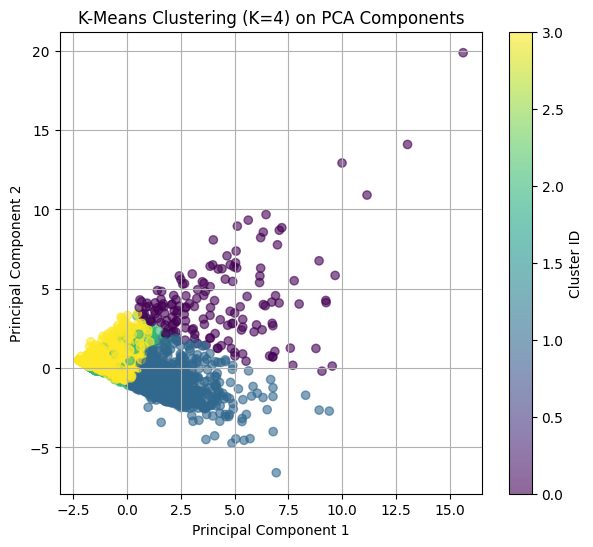

In [43]:
# --- 7. Visualization of Clustering Results ---

plt.figure(figsize=(15, 6))

# K-Means Visualization using PCA
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['KMeans_Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title(f'K-Means Clustering (K={K}) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_kmeans, label='Cluster ID')
plt.grid(True)


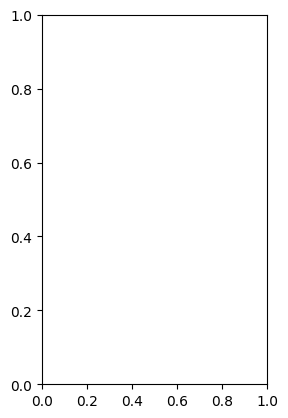

In [45]:
# DBSCAN Visualization using PCA
plt.subplot(1, 2, 2)
# Use a custom colormap to highlight the noise (-1) as black
dbscan_color_map = {label: f'C{label}' if label != -1 else 'black' for label in unique_labels}
colors = [dbscan_color_map[label] for label in dbscan_labels]

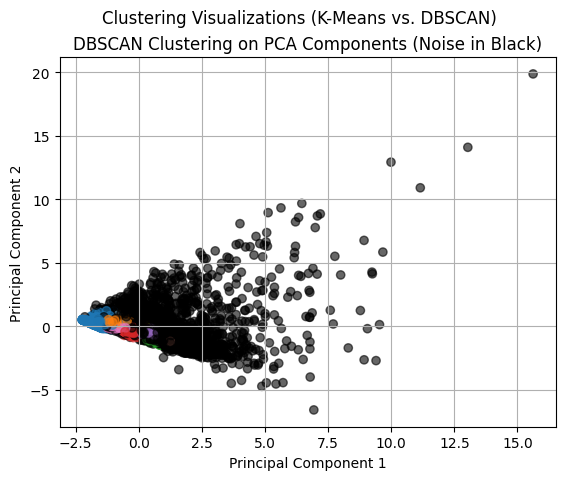

In [49]:
scatter_dbscan = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, marker='o', alpha=0.6)
plt.title('DBSCAN Clustering on PCA Components (Noise in Black)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.suptitle("Clustering Visualizations (K-Means vs. DBSCAN)")
plt.show()

In [50]:
# Final Summary Printout
print("\n--- Clustering Summary ---")
print(f"K-Means (K={K}) Silhouette Score: {kmeans_score:.4f}")
print(f"Hierarchical (n=4) Silhouette Score: {hierarchical_score:.4f}")
print(f"DBSCAN (eps=0.5, minPts=10) Silhouette Score: {dbscan_score:.4f} (Excluding Noise)")
print("\nK-Means provided the most balanced and interpretable clusters for this dataset.")


--- Clustering Summary ---
K-Means (K=4) Silhouette Score: 0.1907
Hierarchical (n=4) Silhouette Score: 0.3081
DBSCAN (eps=0.5, minPts=10) Silhouette Score: 0.1656 (Excluding Noise)

K-Means provided the most balanced and interpretable clusters for this dataset.
